Load Data
---

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/bank-full.csv',sep=';')

data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [4]:
data['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

# Preprocessing Data

In [5]:
#Cek Missing Value
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [6]:
missing_values = ["unknown"]

new_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/bank-full.csv',sep=';', na_values = missing_values)

print(new_data.isnull().sum())

age              0
job            288
marital          0
education     1857
default          0
balance          0
housing          0
loan             0
contact      13020
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome     36959
y                0
dtype: int64


**Handling Outlier**

1. Memeriksa Outlier pada feature 'age'

Age Shape: (45211, 17)


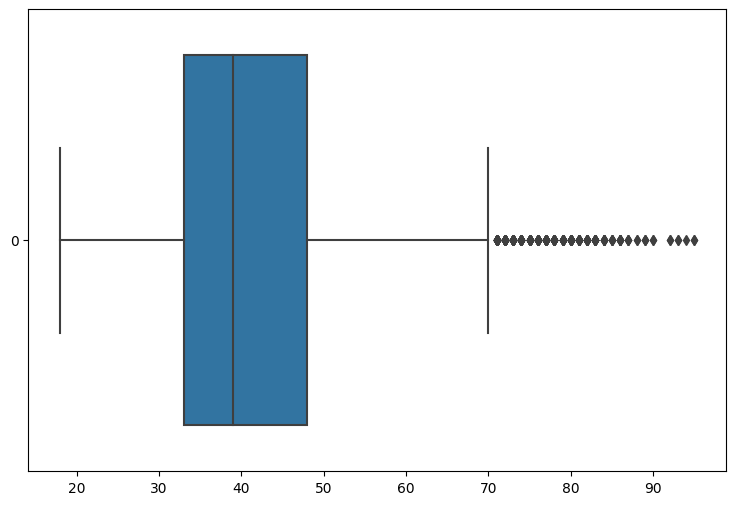

In [8]:
warnings.filterwarnings("ignore")
fig, axes = plt.subplots(figsize=(9, 6))

print("Age Shape:",data.shape)

max_val = data.age.quantile(0.75)
min_val = data.age.quantile(0.25)

sns.boxplot(data['age'],orient='h')
plt.show()

Ketike memeriksa box plot untuk age, tidak ada outlier signifikan, dan terdapat banyak data point diluar plot yang mungkin membawa informasi

2. memeriksa outlier pada feature balance

Balance Shape: (45092, 45)


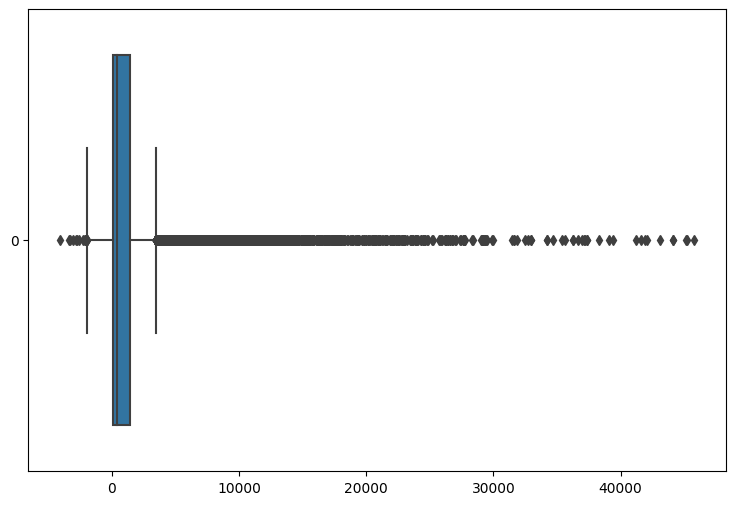

72.0


In [42]:
fig, axes = plt.subplots(figsize=(9, 6))

print("Balance Shape:",data.shape)

max_val = data.balance.quantile(0.75)
min_val = data.balance.quantile(0.25)

sns.boxplot(data['balance'],orient='h')
plt.show()
print(min_val)

melihat plot untuk feature balance, ada banyak data point yang berada diluar boxplot. menentukan cutoff region untuk outlier balance diatas 600 dan dibawah 50000

After Balance Shape: (45191, 17)


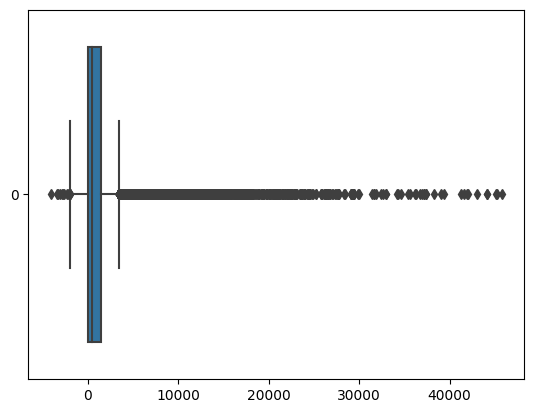

In [10]:
data = data[(data['balance']>-6000) & (data['balance']<50000)]

print("After Balance Shape:",data.shape)

sns.boxplot(data['balance'],orient='h')
plt.show()

3. Check outlier untuk feature day

Day Shape: (45191, 17)


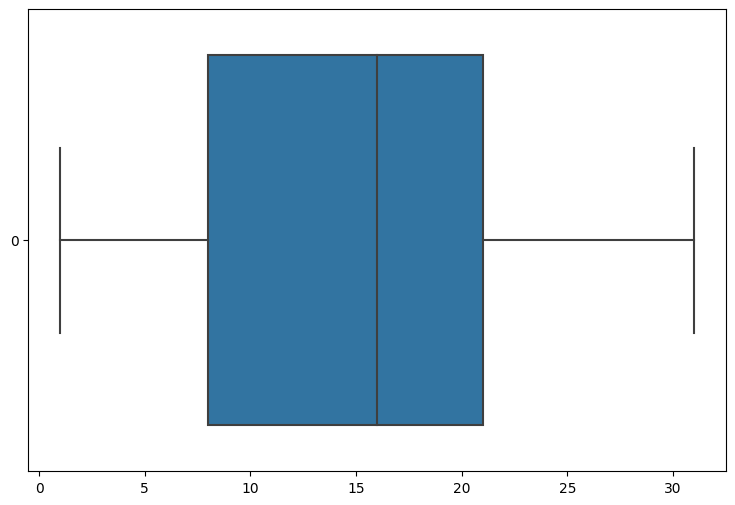

In [11]:
fig, axes = plt.subplots(figsize=(9, 6))

print("Day Shape:",data.shape)

max_val = data.balance.quantile(0.75)
min_val = data.balance.quantile(0.25)

sns.boxplot(data['day'],orient='h')
plt.show()


tidak ada outliler pada feature day

4. memeriksa outlier pada feature duration

Duration Shape: (45191, 17)


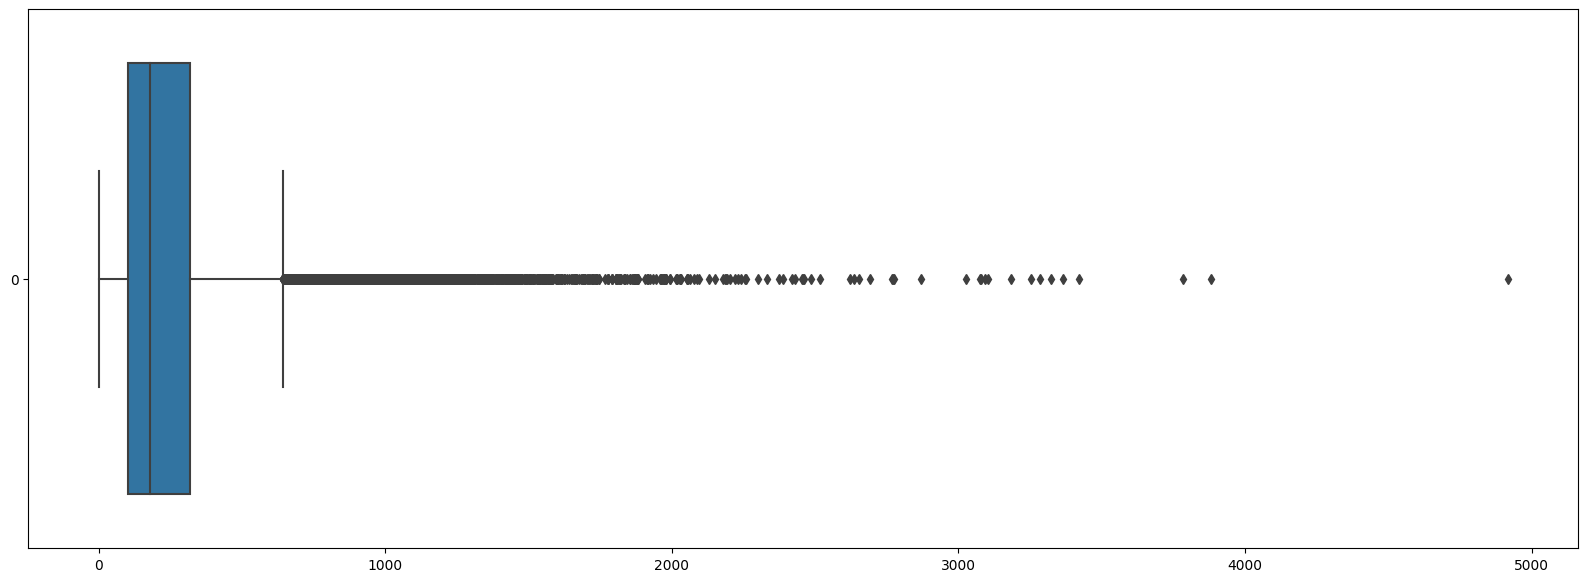

In [12]:
fig, axes = plt.subplots(figsize=(20, 7))

print("Duration Shape:",data.shape)

max_val = data.balance.quantile(0.75)
min_val = data.balance.quantile(0.25)

sns.boxplot(data['duration'],orient='h')
plt.show()

ketika memeriksa boxplot diatas kita dapat melihat gap yang significant pada value 2600

After Duration Shape: (45169, 17)


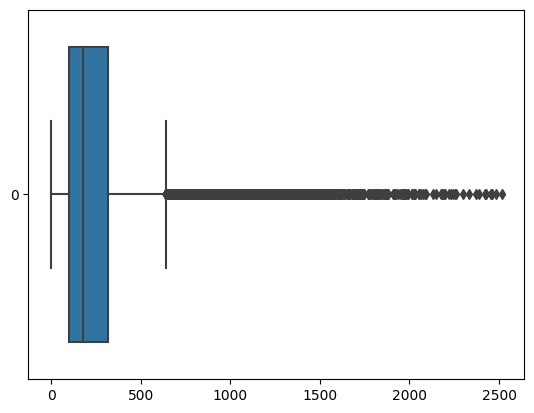

In [13]:

data = data[(data['duration']<2600)]

print("After Duration Shape:",data.shape)

sns.boxplot(data['duration'],orient='h')
plt.show()

setelah mengurangi outlier, jumlah dataset telah dikurangi ke 45169

5. Checking outliers in campaign feature

Campaign Shape: (45169, 17)


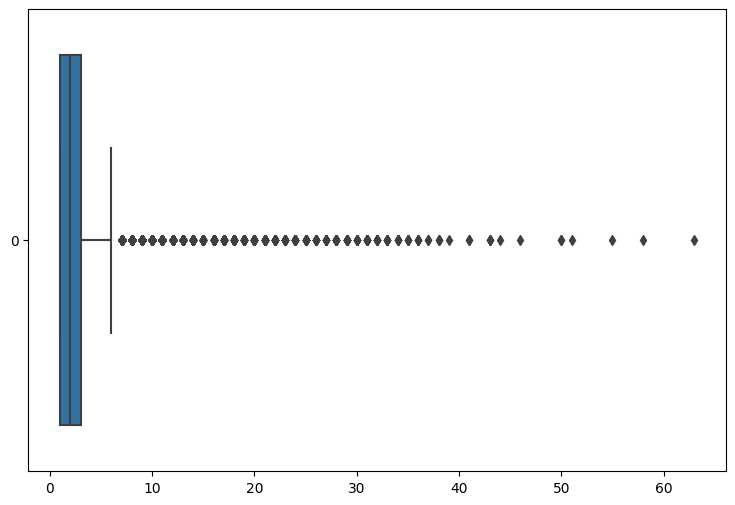

In [14]:
fig, axes = plt.subplots(figsize=(9, 6))

print("Campaign Shape:",data.shape)

max_val = data.campaign.quantile(0.75)
min_val = data.campaign.quantile(0.25)

sns.boxplot(data['campaign'],orient='h')
plt.show()

ketika memeriksa boxplot, ada jeda pada datapoint di luar boxplot

After Campaign Shape: (45156, 17)


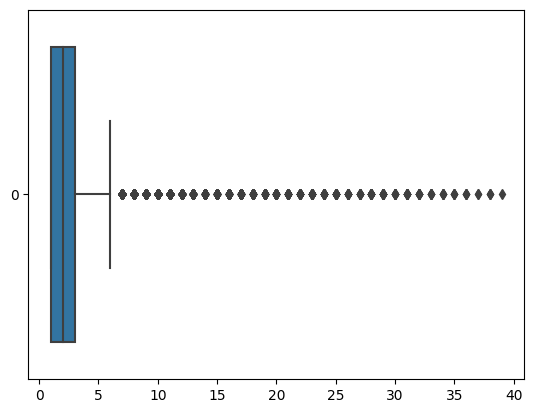

In [15]:
data = data[(data['campaign']<40)]

print("After Campaign Shape:",data.shape)

sns.boxplot(data['campaign'],orient='h')
plt.show()

6. memeriksa outlier pada pdays feature

pdays Shape: (45156, 17)


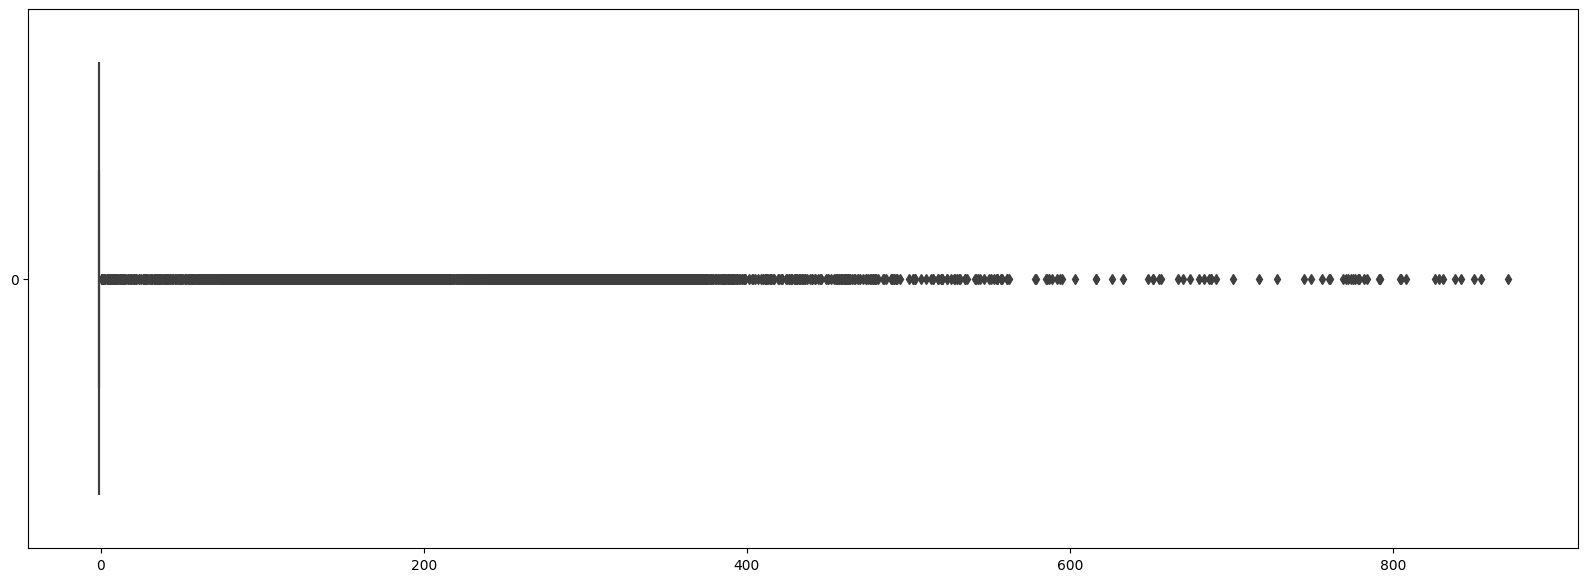

In [16]:
fig, axes = plt.subplots(figsize=(20, 7))


print("pdays Shape:",data.shape)

max_val = data.pdays.quantile(0.75)
min_val = data.pdays.quantile(0.25)

sns.boxplot(data['pdays'],orient='h')
plt.show()

kita dapat melihat breaking point 580, menghapus outlier setelah pdays = 575

After pdays Shape: (45095, 17)


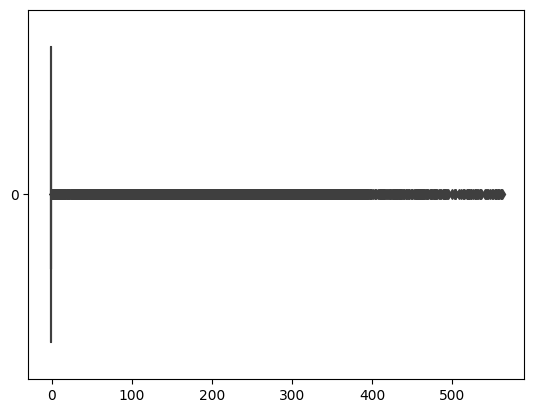

In [17]:
data = data[(data['pdays']<575)]

print("After pdays Shape:",data.shape)

sns.boxplot(data['pdays'],orient='h')
plt.show()

7. memeriksa outlier pada feature previous

previous Shape: (45095, 17)


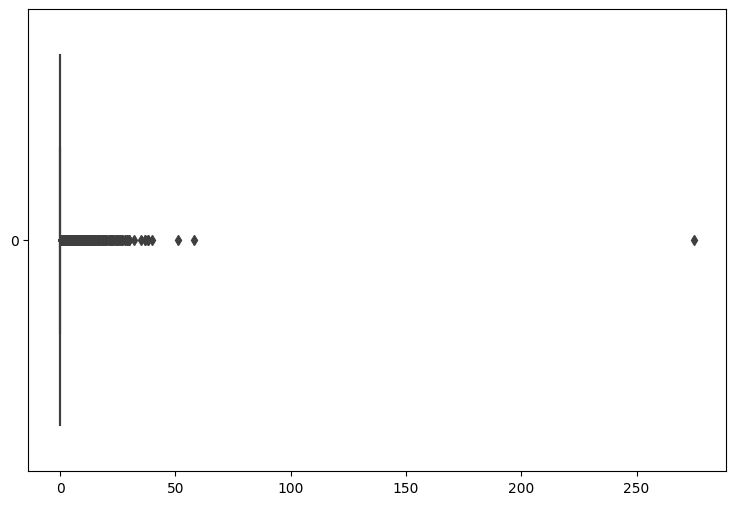

In [18]:
fig, axes = plt.subplots(figsize=(9, 6))

print("previous Shape:",data.shape)

max_val = data.previous.quantile(0.75)
min_val = data.previous.quantile(0.25)

sns.boxplot(data['previous'],orient='h')
plt.show()

kita dapat melihat 3 outlier setelah range 50, jadi outlier setelah previous = 50 akan dihapus

After previous Shape: (45092, 17)


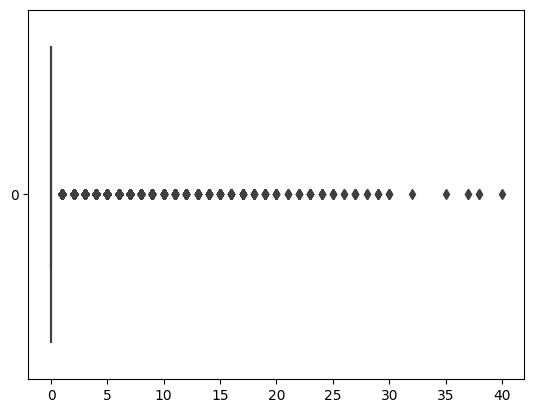

In [19]:
data = data[(data['previous']<50)]

print("After previous Shape:",data.shape)

sns.boxplot(data['previous'],orient='h')
plt.show()

data yang tersisa adalah 45092, kita telah menghapus sebanyak 45211 - 45092 = 119 outliers

**Feature Encoding**

pada proses ini kita mengubah data kategorikal menjadi numerikal menggunakan label encoder

In [20]:
data['y'] = LabelEncoder().fit_transform(data['y'])
data['y']

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45092, dtype: int64

ada feature yang memiliki kategorikal ordinal data type

In [21]:
data['education'].value_counts()

education_mapper = {"unknown":-1, "primary":1, "secondary":2, "tertiary":3}
data["education"] = data["education"].replace(education_mapper)
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,3,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,2,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,2,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,-1,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,-1,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,3,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,retired,divorced,1,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,1
45208,72,retired,married,2,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,married,2,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,0


**Menghapus Fitur yang tidak diinginkan**

Atribut duration sangat mempengaruhi target output (yaitu apakah nasabah mau atau tidak menerima tawaran deposito berjangka). Misalnya, jika duration=0, artinya panggilan telepon tidak terjadi atau tidak ada respons, maka target output y=‘no’, artinya nasabah tidak mau menerima tawaran

atribut duration tidak diketahui sebelum panggilan telepon dilakukan. Hanya setelah panggilan telepon selesai, atribut duration dan target output y baru diketahui

In [22]:
data.drop(['duration'], inplace=True, axis = 1)

data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
0,58,management,married,3,no,2143,yes,no,unknown,5,may,1,-1,0,unknown,0
1,44,technician,single,2,no,29,yes,no,unknown,5,may,1,-1,0,unknown,0
2,33,entrepreneur,married,2,no,2,yes,yes,unknown,5,may,1,-1,0,unknown,0
3,47,blue-collar,married,-1,no,1506,yes,no,unknown,5,may,1,-1,0,unknown,0
4,33,unknown,single,-1,no,1,no,no,unknown,5,may,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,3,no,825,no,no,cellular,17,nov,3,-1,0,unknown,1
45207,71,retired,divorced,1,no,1729,no,no,cellular,17,nov,2,-1,0,unknown,1
45208,72,retired,married,2,no,5715,no,no,cellular,17,nov,5,184,3,success,1
45209,57,blue-collar,married,2,no,668,no,no,telephone,17,nov,4,-1,0,unknown,0


menggunakan OneHot Encoding untuk mengubah kategorikal feature job,marital,contact, month, poutcome

In [23]:
categorial_features = ['job', 'marital', 'contact', 'month', 'poutcome']

for item in categorial_features:
    df = pd.get_dummies(data[item], prefix=item)
    data = data.drop(item, axis=1)
    for categorial_feature in df.columns:
        data[categorial_feature] = df[categorial_feature]

In [24]:
binary_valued_features = ['default','housing', 'loan']
bin_dict = {'yes':1, 'no':0}

for item in binary_valued_features:
    data.replace({item:bin_dict},inplace=True)

kita sudah mengkonversi seluruh feature dengan data types kategorik menjadi numerik

In [25]:
cols = list(data.columns.values)
cols.pop(cols.index('y'))
data = data[cols+['y']] #Buat dataframe baru dengan columns pada urutan baru

setelah melakukan OneHot Encoding pada data kategorikal maka muncul colom baru pada dataframe, dan label y tidak berada pada akhir dataframe

In [26]:
data.describe()

,age,education,default,balance,housing,loan,day,campaign,pdays,previous,...,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y
count,45092.000000,45092.000000,45092.000000,45092.000000,45092.000000,45092.000000,45092.000000,45092.000000,45092.000000,45092.000000,...,45092.000000,45092.000000,45092.000000,45092.000000,45092.000000,45092.000000,45092.000000,45092.000000,45092.000000,45092.000000
mean,40.929899,2.019139,0.018030,1337.164730,0.556041,0.160206,15.807416,2.752905,39.302249,0.567019,...,0.010490,0.304999,0.087954,0.016123,0.012353,0.107713,0.040384,0.033421,0.818482,0.116406
std,10.614841,0.902716,0.133061,2742.702618,0.496855,0.366801,8.321816,3.000820,97.020071,1.844048,...,0.101882,0.460412,0.283230,0.125948,0.110455,0.310021,0.196861,0.179734,0.385451,0.320715
min,18.000000,-1.000000,0.000000,-4057.000000,0.000000,0.000000,1.000000,1.000000,-1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,2.000000,0.000000,72.000000,0.000000,0.000000,8.000000,1.000000,-1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,39.000000,2.000000,0.000000,448.000000,1.000000,0.000000,16.000000,2.000000,-1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,48.000000,3.000000,0.000000,1425.000000,1.000000,0.000000,21.000000,3.000000,-1.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,95.000000,3.000000,1.000000,45789.000000,1.000000,1.000000,31.000000,39.000000,562.000000,40.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Splitting The Data**

In [27]:
y = data['y']
x = data.values[:,:-1] #Mengambil semua kolom kecuali kolom terakhir

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state=50)

menggunakan train_test_split untuk membagi data menjadi train dan test dengan ukuran 80/20, dengan random_state untuk memastikan pembagian data dilakukan dengan cara yang sama

**Feature Scaling**

Setelah melakukan encoding, mengubah data kategorikal menjadi data numerikal, maka dataset memiliki range data yang berbeda, feature numerikal dihitung dengan menghilangkan rata rata dan menghitung unit variance

In [28]:
scaler = StandardScaler()
scaler.fit(x)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [29]:
x_train = pd.DataFrame(x_train)
x_test = pd.DataFrame(x_test)

# Feature Engineering

**Buat Correlation Matrix**

menggunakan correlation coefficient untuk memeriksa hubungan fitur yang berbeda dengan output

setiap jenis korelasi yang ada dalam spectrum di representasikan dari 0 menuju 1, jika sedikit positif korelasi feature maka akan bernilai 0.5 atau 0.7, jika ada korelasi positif yang kuat dan sempurna maka score nya 0.9 atau 1

,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
0,1.000000,-0.164160,-0.015227,0.086632,-0.179804,-0.016287,-0.007087,0.005524,-0.026688,0.002297,...,0.052429,0.022825,-0.125761,0.029050,0.061120,0.033475,-0.008377,-0.021871,0.032141,0.002919
1,-0.164160,1.000000,-0.008288,0.046873,-0.021548,0.015159,0.018139,0.001410,0.006897,0.026724,...,-0.068824,0.018169,-0.068977,0.051460,0.010865,0.001384,0.020024,0.008748,0.028548,-0.033866
2,-0.015227,-0.008288,1.000000,-0.071413,-0.004733,0.070133,0.005912,0.016081,-0.027990,-0.020866,...,0.006028,-0.014019,-0.002881,0.009799,-0.017395,-0.012491,-0.023488,-0.015419,-0.023613,0.037753
3,0.086632,0.046873,-0.071413,1.000000,-0.064539,-0.090828,0.009663,-0.016481,0.003927,0.025602,...,0.033259,0.029632,-0.073507,0.124019,0.045353,0.018811,0.016565,0.008178,0.033107,-0.032908
4,-0.179804,-0.021548,-0.004733,-0.064539,1.000000,0.041551,-0.030964,-0.029192,0.133308,0.043427,...,-0.106072,-0.068011,0.426129,0.003226,-0.089980,-0.074278,0.112398,0.037032,-0.087610,-0.068683
5,-0.016287,0.015159,0.070133,-0.090828,0.041551,1.000000,0.010779,0.012088,-0.019148,-0.011602,...,-0.025250,-0.029853,-0.025027,0.015810,-0.030357,-0.031792,0.000931,-0.007114,-0.052044,0.027069
6,-0.007087,0.018139,0.005912,0.009663,-0.030964,0.010779,1.000000,0.167007,-0.094614,-0.061620,...,-0.196811,-0.019449,-0.026958,0.095247,0.028929,-0.053488,-0.069878,-0.033025,-0.028486,0.086364
7,0.005524,0.001410,0.016081,-0.016481,-0.029192,0.012088,0.167007,1.000000,-0.088567,-0.037563,...,0.039771,-0.018677,-0.074723,-0.087845,-0.053320,-0.035423,-0.088182,-0.018895,-0.059563,0.108394
8,-0.026688,0.006897,-0.027990,0.003927,0.133308,-0.019148,-0.094614,-0.088567,1.000000,0.555006,...,-0.117551,0.028234,0.088779,0.013275,0.053665,0.054546,0.715263,0.384932,0.234780,-0.881427
9,0.002297,0.026724,-0.020866,0.025602,0.043427,-0.011602,-0.061620,-0.037563,0.555006,1.000000,...,-0.075735,0.032310,0.004265,0.052001,0.066291,0.071680,0.436729,0.360163,0.252633,-0.652595


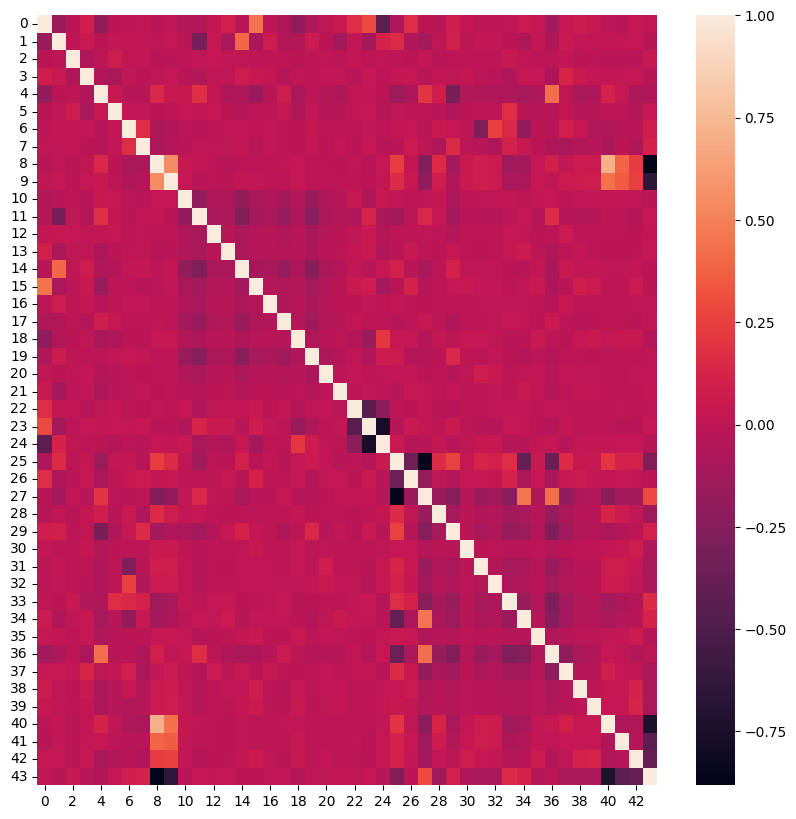

In [37]:
correlation_matrix = pd.DataFrame(x_train).corr()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(correlation_matrix, ax=ax)
correlation_matrix

setelah memuat matrix korelasi, dapat didlihat di sisi kanan matrix, ada feature yang memiliki korelasi tinggi, biasanya feature dengan korelasi tinggi dihapus karena sangat ketergantungan dengan feature lain. feature ini berkontribusi sedikit dalam memprediksi output tetapi menaikan beban komputasional

sangat jelas bahwa feature yang berkorelasi artinya membawa informasi yang sama, jadi masuk akal menghapus salah satunya

untuk menemukan kolom yang tepat memiliki korelasi tinggi, check segitiga atas dari matrix korelasi karena segitiga atas dan bawah adalah cerminan masing masing yang dibagi oleh diagonal matrix korelasi. di kode ini memeriksa kolom yang memiliki nilai korelasi diatas 0.95 dan menghapusnya

In [31]:
upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape),k=1).astype(np.bool))
print(upper_tri)

to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
print('\nTo drop')
print(to_drop)

x_train = x_train.drop(x_train.columns[to_drop], axis=1)
x_test = x_test.drop(x_test.columns[to_drop], axis=1)
print(x_train.head())

    0        1         2         3         4         5         6         7   \
0  NaN -0.16416 -0.015227  0.086632 -0.179804 -0.016287 -0.007087  0.005524   
1  NaN      NaN -0.008288  0.046873 -0.021548  0.015159  0.018139  0.001410   
2  NaN      NaN       NaN -0.071413 -0.004733  0.070133  0.005912  0.016081   
3  NaN      NaN       NaN       NaN -0.064539 -0.090828  0.009663 -0.016481   
4  NaN      NaN       NaN       NaN       NaN  0.041551 -0.030964 -0.029192   
5  NaN      NaN       NaN       NaN       NaN       NaN  0.010779  0.012088   
6  NaN      NaN       NaN       NaN       NaN       NaN       NaN  0.167007   
7  NaN      NaN       NaN       NaN       NaN       NaN       NaN       NaN   
8  NaN      NaN       NaN       NaN       NaN       NaN       NaN       NaN   
9  NaN      NaN       NaN       NaN       NaN       NaN       NaN       NaN   
10 NaN      NaN       NaN       NaN       NaN       NaN       NaN       NaN   
11 NaN      NaN       NaN       NaN       NaN       

setelah kode diatas dijalankan, kita bisa melihat tidak ada lagi kolom yang memiliki nilai korelasi diatas 0.95 maka tidak ada kolom yang perlu dihapus lagi

**Applying PCA**

Principal Component Analysis (PCA), adalah metode yang digunakan untuk mengurangi dimensi dari dataset yang besar dengan mentransformasi banyak set variabel besar ke ukuran kecil, yang masih memiliki kebanyakan informasi yang dimiliki oleh set yang besar

In [32]:
pca = PCA(n_components=0.95)
pca.fit(x_train)
PCA_X_train = pca.transform(x_train)
PCA_X_test = pca.transform(x_test)

x_train

,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
0,-0.558648,-1.128982,-0.135502,-0.479519,0.893548,-0.436770,-0.097025,-0.250903,2.707694,0.777093,...,-0.365813,-0.102961,1.509537,-0.31054,-0.128011,-0.111835,-0.347442,4.874651,-0.185947,-2.123465
1,1.796571,-0.021201,-0.135502,-0.484989,-1.119134,2.289535,0.263477,0.748835,-0.415406,-0.307489,...,-0.365813,-0.102961,-0.662455,-0.31054,-0.128011,-0.111835,-0.347442,-0.205143,-0.185947,0.470928
2,0.666066,-0.021201,-0.135502,0.085987,-1.119134,-0.436770,-1.298699,-0.584149,-0.415406,-0.307489,...,-0.365813,-0.102961,-0.662455,-0.31054,-0.128011,-0.111835,-0.347442,-0.205143,-0.185947,0.470928
3,-0.841275,-1.128982,-0.135502,-0.491552,0.893548,-0.436770,1.344984,-0.584149,-0.415406,-0.307489,...,-0.365813,-0.102961,1.509537,-0.31054,-0.128011,-0.111835,-0.347442,-0.205143,-0.185947,0.470928
4,-0.181813,-0.021201,-0.135502,-0.001518,0.893548,2.289535,1.585319,-0.250903,2.130487,0.234802,...,-0.365813,-0.102961,-0.662455,-0.31054,-0.128011,-0.111835,2.878180,-0.205143,-0.185947,-2.123465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36068,-0.747066,1.086579,-0.135502,0.232195,-1.119134,-0.436770,-0.217193,-0.250903,1.563588,0.234802,...,-0.365813,-0.102961,-0.662455,-0.31054,-0.128011,-0.111835,2.878180,-0.205143,-0.185947,-2.123465
36069,-0.558648,1.086579,-0.135502,-0.387274,0.893548,-0.436770,1.104649,0.748835,-0.415406,-0.307489,...,-0.365813,-0.102961,-0.662455,-0.31054,-0.128011,-0.111835,-0.347442,-0.205143,-0.185947,0.470928
36070,-1.123901,-3.344543,-0.135502,-0.233045,-1.119134,-0.436770,-0.938197,-0.584149,-0.415406,-0.307489,...,-0.365813,-0.102961,-0.662455,-0.31054,-0.128011,-0.111835,-0.347442,-0.205143,-0.185947,0.470928
36071,-1.312319,-0.021201,-0.135502,-0.358834,0.893548,-0.436770,-0.097025,-0.584149,-0.415406,-0.307489,...,-0.365813,-0.102961,1.509537,-0.31054,-0.128011,-0.111835,-0.347442,-0.205143,-0.185947,0.470928


disini, n_components dari PCA model tidak di set manual. karena kita ingin varisai yang dijelaskan berada di antara 95-99%, maka kita atur n_components PCA ke 0.95

# Developing Multi-layer Perceptron

In [40]:
mlp = MLPClassifier(hidden_layer_sizes=(50,200,50), max_iter=300, activation='relu', solver='adam', random_state=1)
mlp.fit(PCA_X_train, y_train)

MLPClassifier(hidden_layer_sizes=(50, 200, 50), max_iter=300, random_state=1)

In [34]:
PCA_X_train

array([[ 3.17428136,  2.9417411 ,  1.10190984, ..., -0.7581117 ,
        -0.06754851, -0.08753574],
       [-0.45357695, -2.77266654,  2.74546928, ...,  0.35935679,
        -0.51365627, -0.72655917],
       [-0.28609767, -1.77098747,  0.85752515, ..., -1.11515942,
        -0.22941411, -0.16754282],
       ...,
       [ 0.32611861, -0.83789589, -1.5608128 , ...,  0.96349741,
         1.89423924,  3.23526765],
       [-0.2452907 ,  0.84814249, -2.59078885, ..., -0.11918013,
        -0.39904162, -0.09239883],
       [-0.34673753, -0.82099457,  0.23221502, ..., -1.23767651,
        -0.6650229 , -0.04314375]])

Accuracy
0.8546402040137487


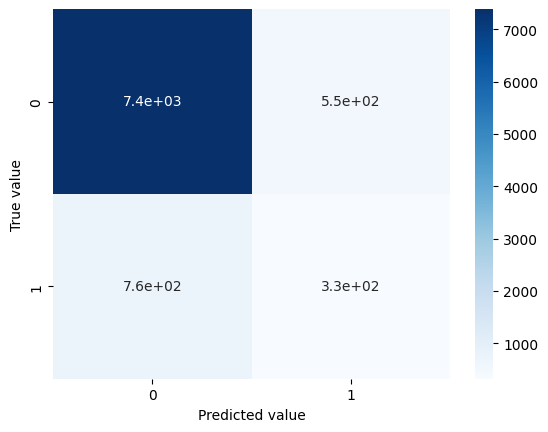

In [35]:
print('Accuracy')
print(mlp.score(PCA_X_test, y_test))

predict = mlp.predict(PCA_X_test)

confusion_matrix = confusion_matrix(y_test, predict)
fig, ax = plt.subplots(1)
ax = sns.heatmap(confusion_matrix, ax=ax, cmap=plt.cm.Blues, annot=True)
plt.ylabel('True value')
plt.xlabel('Predicted value')
plt.show()

dari confusion matrix diatas menunjukan ada 340 True Positive dan 7400 false negative, artinya cukup bagus untuk dataset yang tidak balance. utnuk false positive berjumlah 570 dan true negative berjumlah 750

kita dapat menemukan Mean Squared Error dan score lainnya dengan cara:

In [38]:
print("Training error: %f" % mlp.loss_curve_[-1])
print("Training set score: %f" % mlp.score(PCA_X_train, y_train))
print("Test set score: %f" % mlp.score(PCA_X_test, y_test))
print(accuracy_score(y_test, predict))

print("MSE: %f" % mean_squared_error(y_test, predict))

Training error: 0.089994
Training set score: 0.972001
Test set score: 0.854640
0.8546402040137487
MSE: 0.145360
